La régression logistique, malgré son nom, est une technique de classification et non de régression. Dans le cas d’une classification multiclasse, elle est dite **polytomique**.

# Régression logistique binaire
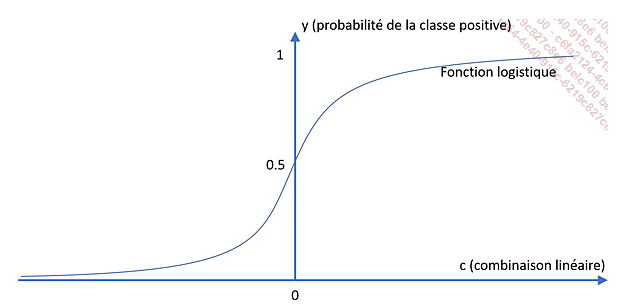

**Idée principale**: Elle modélise la probabilité que la sortie soit 1 en fonction des entrées.

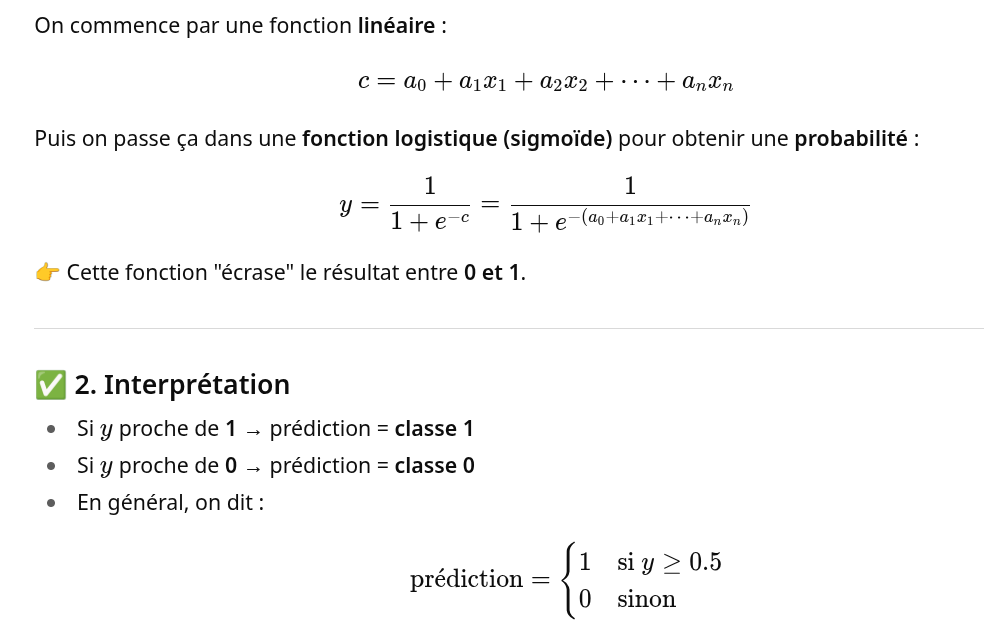

Exemple:
Une régression logistique réalisée sur trois variables et la fonction linéaire :

c = $3x_1$ + $2x_2$ - $x_3$

Les poids accordés aux variables sont de 3 pour la variable $x_1$, 2 pour la variable $x_2$ et -1 pour la variable $x_3$. En supposant la normalisation des variables, la variable $x_1$ est celle qui a le plus d’impact (trois fois plus que $x_3$), et plus elle est grande, plus la probabilité d’être dans la classe positive augmente. Au contraire, la variable $x_3$ a un effet négatif sur cette probabilité.

# Régression logistique polytomique
Avec la logistique polytomique, ce n'est plus une seule combinaison linéaire, mais une combinaison qui sera faite pour chaque classe afin d'obtenir la probabilité d'être dans une classe donnée. À la sortie, de l'algo, il y a une normalisation pour que la somme des prob. donnent 1. (softmax)

Nb_param = (Nb_variables + 1) * Nb_classes

Dans la librairie Scikit-learn, le classifier à utiliser est **LogisticRegression**. (sklearn.linear_model).

In [4]:
import sklearn
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Charger les données
titanic_df = pd.read_csv("titanic.csv")

# Prétraitement minimal : supprimer les colonnes non numériques
titanic_df = titanic_df.select_dtypes(include=['number'])  # garde seulement les colonnes numériques

# Séparer features et cible
y = titanic_df['Survived']
X = titanic_df.drop(['PassengerId', 'Survived'], axis=1)

# Séparer en train/test
train_X_titanic, test_X_titanic, train_y_titanic, test_y_titanic = train_test_split(X, y, train_size=0.8, random_state=42)

logreg = LogisticRegression(random_state=42, solver='liblinear',  max_iter=10)

pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('stand', StandardScaler()),
    ('logreg', logreg)])

pipeline.fit(train_X_titanic, train_y_titanic)
pred_y_titanic = pipeline.predict(test_X_titanic)

print(sklearn.metrics.classification_report(test_y_titanic, pred_y_titanic))

              precision    recall  f1-score   support

           0       0.62      0.96      0.75        50
           1       0.67      0.12      0.20        34

    accuracy                           0.62        84
   macro avg       0.64      0.54      0.47        84
weighted avg       0.64      0.62      0.53        84



In [7]:
# Les coefficients peuvent ensuite être obtenus, ainsi que la valeur de l’intersection :

print(logreg.coef_)
print(logreg.intercept_)

[[-0.15153863 -0.03837085  0.09794228  0.13202327  0.28496061]]
[-0.61333304]
